In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [2]:
# Função de ativação RBF - Gaussiana
def rbf_activation(x, centers, gamma):
    """
    Função de ativação radial Gaussiana
    :param x: Entrada da rede
    :param centers: Centros das funções RBF
    :param gamma: Parâmetro de ajuste para as RBFs
    :return: Saída da camada RBF
    """
    diff = tf.expand_dims(x, axis=1) - centers
    return tf.exp(-gamma * tf.reduce_sum(tf.square(diff), axis=-1))

In [3]:
# Classe para o modelo RBF
class RBFModel(keras.Model):
    def __init__(self, num_centers, gamma):
        super(RBFModel, self).__init__()
        self.centers = self.add_weight(shape=(num_centers, 2), initializer='random_normal', trainable=True)
        self.gamma = gamma
        self.output_layer = layers.Dense(1, activation='sigmoid')

    def call(self, inputs):
        rbf_out = rbf_activation(inputs, self.centers, self.gamma)
        return self.output_layer(rbf_out)


In [4]:
# Dados do problema XOR
x_train = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
y_train = np.array([[0], [1], [1], [0]], dtype=np.float32)

# Hiperparâmetros
num_centers = 2  # Camada oculta com 2 neurônios
gamma = 1.0  # Parâmetro da função gaussiana

# Criar e compilar o modelo
model = RBFModel(num_centers=num_centers, gamma=gamma)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [5]:
# Treinar o modelo
history = model.fit(x_train, y_train, epochs=1000, verbose=1)

Epoch 1/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 0.6782
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.5000 - loss: 0.6779
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5000 - loss: 0.6777
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.5000 - loss: 0.6774
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5000 - loss: 0.6771
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5000 - loss: 0.6769
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5000 - loss: 0.6766
Epoch 8/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.5000 - loss: 0.6764
Epoch 9/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5000 - loss: 0.6761
Epoch 10/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5000 - loss: 0.6759
Epoch 11/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5000 - loss: 0.6756
Epoch 12/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
Entradas: [[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Saídas reais: [0. 1. 1. 0.]
Previsões: [0. 1. 0. 1.]


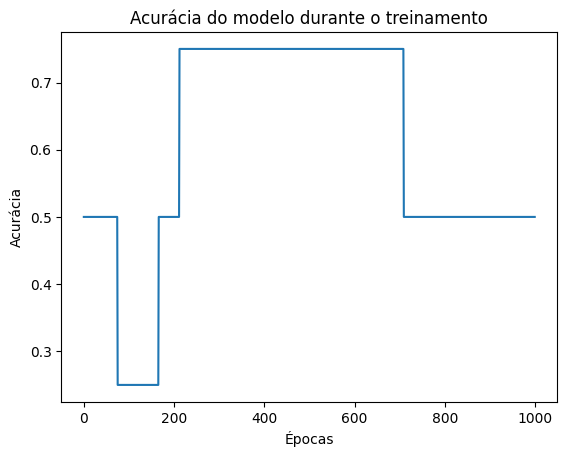

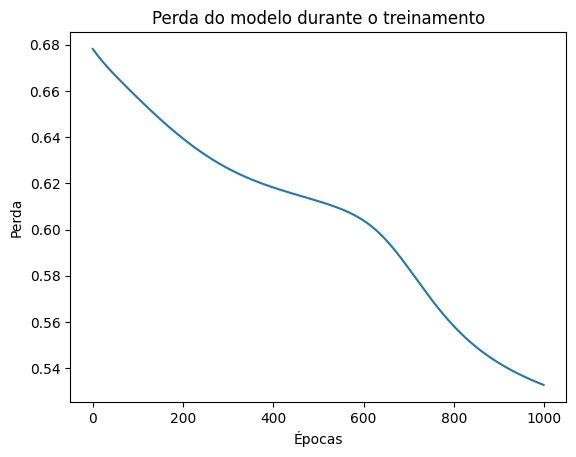

In [6]:
# Avaliar o modelo
predictions = model.predict(x_train)
predictions = np.round(predictions)

# Exibir os resultados
print("Entradas:", x_train)
print("Saídas reais:", y_train.flatten())
print("Previsões:", predictions.flatten())

# Plotar o histórico de treino
plt.plot(history.history['accuracy'])
plt.title('Acurácia do modelo durante o treinamento')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.show()

plt.plot(history.history['loss'])
plt.title('Perda do modelo durante o treinamento')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.show()